In [72]:
import matplotlib.pyplot as plt 
import numpy as np
import re

In [73]:
input = """
============================DEPTH: 2============================

Epoch: 010, Train: 0.8500, Val: 0.5320, Test: 0.5540
Epoch: 020, Train: 0.9714, Val: 0.7580, Test: 0.7490
Epoch: 030, Train: 0.9643, Val: 0.8140, Test: 0.8120
Epoch: 040, Train: 0.9429, Val: 0.7580, Test: 0.7600
Epoch: 050, Train: 0.9714, Val: 0.7900, Test: 0.8030
Epoch: 060, Train: 0.9786, Val: 0.7920, Test: 0.7990
Epoch: 070, Train: 0.9857, Val: 0.8040, Test: 0.8130
Epoch: 080, Train: 0.9857, Val: 0.7920, Test: 0.8300
Epoch: 090, Train: 0.9857, Val: 0.7940, Test: 0.8060
Epoch: 100, Train: 0.9857, Val: 0.8120, Test: 0.8300
Epoch: 110, Train: 0.9857, Val: 0.8040, Test: 0.8310
Epoch: 120, Train: 0.9857, Val: 0.8000, Test: 0.8240
Epoch: 130, Train: 0.9929, Val: 0.7920, Test: 0.8210
Epoch: 140, Train: 0.9929, Val: 0.8000, Test: 0.8190
Epoch: 150, Train: 0.9857, Val: 0.8020, Test: 0.8240
Epoch: 160, Train: 0.9929, Val: 0.7980, Test: 0.8220
Epoch: 170, Train: 0.9857, Val: 0.7840, Test: 0.8050
Epoch: 180, Train: 0.9929, Val: 0.7920, Test: 0.8210
Epoch: 190, Train: 1.0000, Val: 0.8080, Test: 0.8290
Epoch: 200, Train: 1.0000, Val: 0.7940, Test: 0.8050

============================DEPTH: 4============================
Epoch: 010, Train: 0.4571, Val: 0.5220, Test: 0.5260
Epoch: 020, Train: 0.7071, Val: 0.5440, Test: 0.5370
Epoch: 030, Train: 0.9071, Val: 0.7720, Test: 0.7690
Epoch: 040, Train: 0.9286, Val: 0.7920, Test: 0.7800
Epoch: 050, Train: 0.9571, Val: 0.7800, Test: 0.7780
Epoch: 060, Train: 0.9929, Val: 0.7880, Test: 0.7870
Epoch: 070, Train: 0.9929, Val: 0.7900, Test: 0.7950
Epoch: 080, Train: 0.9714, Val: 0.7700, Test: 0.7900
Epoch: 090, Train: 0.9929, Val: 0.7920, Test: 0.7990
Epoch: 100, Train: 0.9929, Val: 0.7900, Test: 0.7810
Epoch: 110, Train: 0.9929, Val: 0.7760, Test: 0.7860
Epoch: 120, Train: 1.0000, Val: 0.7880, Test: 0.7930
Epoch: 130, Train: 1.0000, Val: 0.7600, Test: 0.7730
Epoch: 140, Train: 0.9929, Val: 0.7760, Test: 0.8010
Epoch: 150, Train: 0.9929, Val: 0.7740, Test: 0.7920
Epoch: 160, Train: 1.0000, Val: 0.7760, Test: 0.7850
Epoch: 170, Train: 0.9857, Val: 0.7780, Test: 0.7710
Epoch: 180, Train: 1.0000, Val: 0.7840, Test: 0.7950
Epoch: 190, Train: 1.0000, Val: 0.7700, Test: 0.7820
Epoch: 200, Train: 0.9929, Val: 0.7700, Test: 0.7810

============================DEPTH: 8============================
Epoch: 010, Train: 0.1500, Val: 0.1180, Test: 0.1040
Epoch: 020, Train: 0.1714, Val: 0.1800, Test: 0.1680
Epoch: 030, Train: 0.4143, Val: 0.4880, Test: 0.4880
Epoch: 040, Train: 0.5571, Val: 0.5940, Test: 0.5540
Epoch: 050, Train: 0.6071, Val: 0.5700, Test: 0.5240
Epoch: 060, Train: 0.6071, Val: 0.6260, Test: 0.5910
Epoch: 070, Train: 0.7929, Val: 0.6300, Test: 0.6500
Epoch: 080, Train: 0.8857, Val: 0.6900, Test: 0.7090
Epoch: 090, Train: 0.8571, Val: 0.6820, Test: 0.7050
Epoch: 100, Train: 0.9286, Val: 0.7000, Test: 0.6850
Epoch: 110, Train: 0.9286, Val: 0.6640, Test: 0.7080
Epoch: 120, Train: 0.9571, Val: 0.7180, Test: 0.7270
Epoch: 130, Train: 0.9643, Val: 0.7240, Test: 0.7480
Epoch: 140, Train: 0.9643, Val: 0.7120, Test: 0.7270
Epoch: 150, Train: 0.9500, Val: 0.6760, Test: 0.6820
Epoch: 160, Train: 0.9571, Val: 0.6900, Test: 0.7160
Epoch: 170, Train: 0.9357, Val: 0.6160, Test: 0.6130
Epoch: 180, Train: 0.9143, Val: 0.7240, Test: 0.7230
Epoch: 190, Train: 0.8786, Val: 0.7180, Test: 0.7250
Epoch: 200, Train: 0.9571, Val: 0.7240, Test: 0.7450

============================DEPTH: 16============================

Epoch: 010, Train: 0.1429, Val: 0.1220, Test: 0.1300
Epoch: 020, Train: 0.1429, Val: 0.1220, Test: 0.1300
Epoch: 030, Train: 0.1429, Val: 0.0720, Test: 0.0910
Epoch: 040, Train: 0.1429, Val: 0.0720, Test: 0.0910
Epoch: 050, Train: 0.1429, Val: 0.0720, Test: 0.0910
Epoch: 060, Train: 0.1429, Val: 0.0720, Test: 0.0910
Epoch: 070, Train: 0.1429, Val: 0.0720, Test: 0.0910
Epoch: 080, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 090, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 100, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 110, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 120, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 130, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 140, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 150, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 160, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 170, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 180, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 190, Train: 0.1429, Val: 0.0580, Test: 0.0640
Epoch: 200, Train: 0.1429, Val: 0.0580, Test: 0.0640
"""

In [74]:
lst = re.findall("\d+\.\d+",input)

In [75]:
train = lst[::3]
val = lst[1::3]
test = lst[2::3]

In [76]:
# check if everything is okay 
#train
#val
#test

In [77]:
train1 = train[0:20]
train2 = train[20:40]
train3 = train[40:60]
train4 = train[60:80]

val1 = val[0:20]
val2 = val[20:40]
val3 = val[40:60]
val4 = val[60:80]

test1 = test[0:20]
test2 = test[20:40]
test3 = test[40:60]
test4 = test[60:80]

x = range(1,21,1)

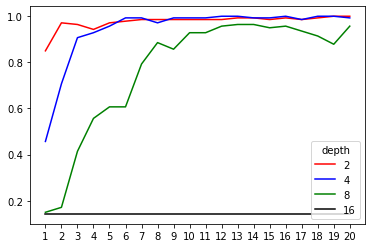

In [78]:
# train
arrTrain1 = np.array(train1)
arrTrain2 = np.array(train2)
arrTrain3 = np.array(train3)
arrTrain4 = np.array(train4)
arrTrain1 = arrTrain1.astype(float)
arrTrain2 = arrTrain2.astype(float)
arrTrain3 = arrTrain3.astype(float)
arrTrain4 = arrTrain4.astype(float)
plt.plot(x, arrTrain1, 'r')
plt.plot(x, arrTrain2, 'b')
plt.plot(x, arrTrain3, 'g')
plt.plot(x, arrTrain4, 'black')
plt.xticks(x)
plt.legend(['2', '4', '8', '16'], title='depth', loc='lower right')
plt.show()

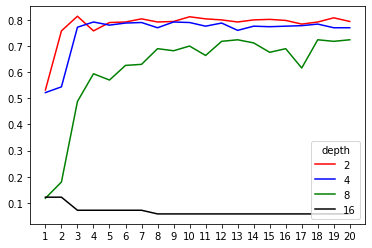

In [79]:
# val
arrVal1 = np.array(val1)
arrVal2 = np.array(val2)
arrVal3 = np.array(val3)
arrVal4 = np.array(val4)
arrVal1 = arrVal1.astype(float)
arrVal2 = arrVal2.astype(float)
arrVal3 = arrVal3.astype(float)
arrVal4 = arrVal4.astype(float)
plt.plot(x, arrVal1, 'r')
plt.plot(x, arrVal2, 'b')
plt.plot(x, arrVal3, 'g')
plt.plot(x, arrVal4, 'black')
plt.xticks(x)
plt.legend(['2', '4', '8', '16'], title='depth', loc='lower right')
plt.show()

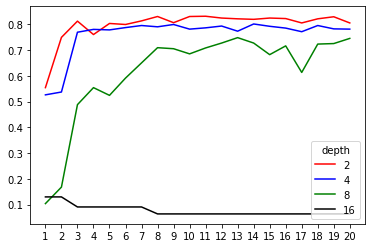

In [80]:
# test
arrTest1 = np.array(test1)
arrTest2 = np.array(test2)
arrTest3 = np.array(test3)
arrTest4 = np.array(test4)
arrTest1 = arrTest1.astype(float)
arrTest2 = arrTest2.astype(float)
arrTest3 = arrTest3.astype(float)
arrTest4 = arrTest4.astype(float)
plt.plot(x, arrTest1, 'r')
plt.plot(x, arrTest2, 'b')
plt.plot(x, arrTest3, 'g')
plt.plot(x, arrTest4, 'black')
plt.xticks(x)
plt.legend(['2', '4', '8', '16'], title='depth', loc='lower right')
plt.show()